<a href="https://colab.research.google.com/github/renzodamgo/UPC-PDI-CC61/blob/main/TA_05_B%C3%BAsqueda_de_logotipos_Resuelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Universidad Peruana de Ciencias Aplicadas**
### CC53 - Procesamiento de Imágenes
### Docente: Pablo Fonseca <pcsipfon@upc.edu.pe>
### Compresión de imágenes

---

### **Tarea Académica 05**

In [1]:
from IPython.display import Image
import tensorflow.keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import glob
from tqdm.notebook import tqdm

### **Keras Applications**

Ver más: https://keras.io/api/applications/

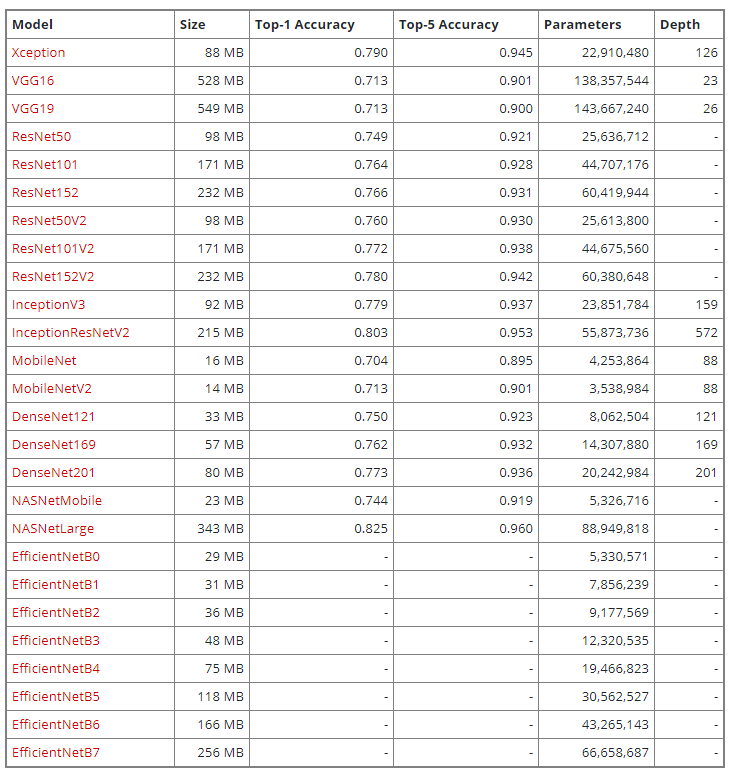

In [2]:
#@title Cargar `ResNet50` pre-entrenado con  **`include_top=False`** 🤖 { run: "auto" }
model_name = "ResNet50" #@param ["ResNet50"]
if model_name == "ResNet50":
  from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
  model = ResNet50(weights='imagenet', include_top=False)
  target_size=(224, 224)
print("Modelo cargado: {}".format(model.name))

94773248/94765736 [==============================] - 3s 0us/step
Modelo cargado: resnet50


### **Mostrar Modelo**

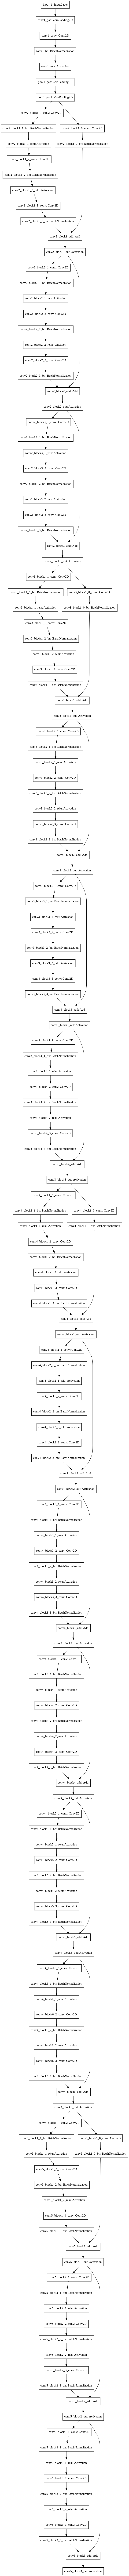

In [3]:
plot_model(model)

In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### **Cargar imagen de prueba 🐘🖼️**

--2021-06-08 16:10:38--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/African_Bush_Elephants.jpg/800px-African_Bush_Elephants.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244362 (239K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 238.63K  --.-KB/s    in 0.02s   

2021-06-08 16:10:38 (12.3 MB/s) - ‘image.jpg’ saved [244362/244362]



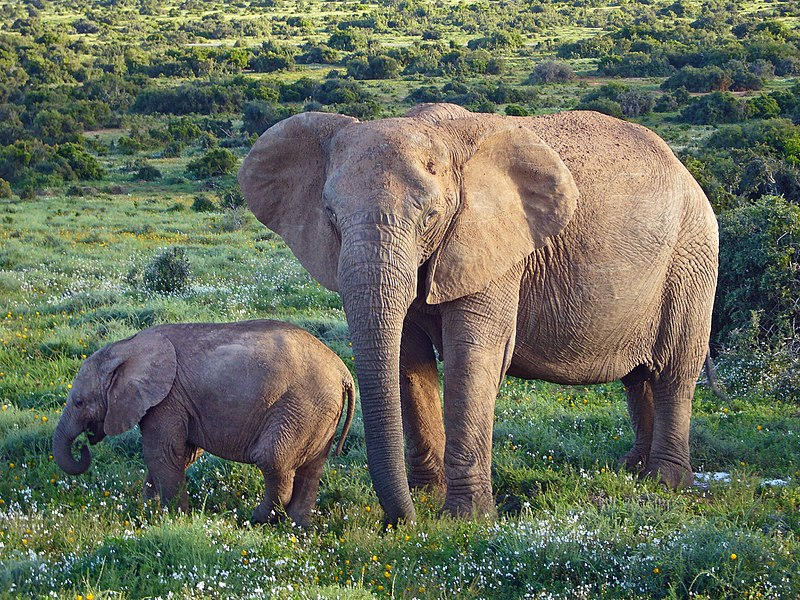

In [5]:
!wget -O image.jpg 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/African_Bush_Elephants.jpg/800px-African_Bush_Elephants.jpg'
img_path = 'image.jpg'
display(Image(img_path))

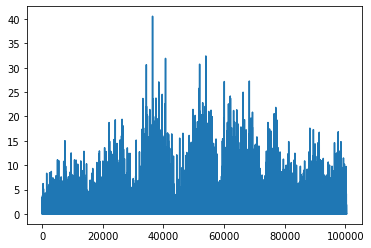

In [6]:
img = image.load_img(img_path, target_size=target_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x).ravel()
plt.plot(preds)

In [7]:
#@title Obtener Data (Wang, J., Min, W., Hou, S., Ma, S., Zheng, Y., Wang, H., & Jiang, S. (2020, April). Logo-2K+: A large-scale logo dataset for scalable logo classification. In Proceedings of the AAAI Conference on Artificial Intelligence (Vol. 34, No. 04, pp. 6194-6201).)
!gdown --id 1ilds5sgCepiADsVvZIqmyeQjB8UTZpeJ
!unzip Logo-2K+.zip
filenames = glob.glob('Logo-2K+/*/*/1.jpg')

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: Logo-2K+/Transportation/Montague/55.jpg  
  inflating: Logo-2K+/Transportation/Montague/56.jpg  
  inflating: Logo-2K+/Transportation/Montague/57.jpg  
  inflating: Logo-2K+/Transportation/Montague/58.jpg  
  inflating: Logo-2K+/Transportation/Montague/59.jpg  
  inflating: Logo-2K+/Transportation/Montague/6.jpg  
  inflating: Logo-2K+/Transportation/Montague/60.jpg  
  inflating: Logo-2K+/Transportation/Montague/61.jpg  
  inflating: Logo-2K+/Transportation/Montague/62.jpg  
  inflating: Logo-2K+/Transportation/Montague/63.jpg  
  inflating: Logo-2K+/Transportation/Montague/64.jpg  
  inflating: Logo-2K+/Transportation/Montague/65.jpg  
  inflating: Logo-2K+/Transportation/Montague/66.jpg  
  inflating: Logo-2K+/Transportation/Montague/67.jpg  
  inflating: Logo-2K+/Transportation/Montague/68.jpg  
  inflating: Logo-2K+/Transportation/Montague/7.jpg  
  inflating: Logo-2K+/Transportation/Montague/8.jpg  
  infla

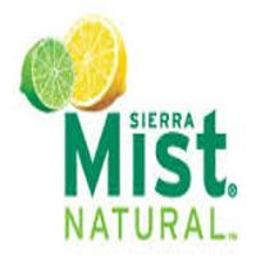

In [15]:
#@title Visualizar Dataset { run: "auto" }
idx = 334 #@param {type:"slider", min:0, max:2340, step:1}
display(Image(filenames[idx]))

In [16]:
features = []
for filename in tqdm(filenames):
  img = image.load_img(filename, target_size=target_size)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features.append(model.predict(x).ravel())
features = np.array(features)
features.shape

(2341, 100352)

# **Ejercicio (20 puntos)** 

Muestre los k logotipos más próximos (usando las características de un `ResNet50`).

Nota: Puede usar distancia euclidiana, coseno u otras.

Nota: Puede usar la función [sklearn.neighbors.NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html)

Imagen de Query


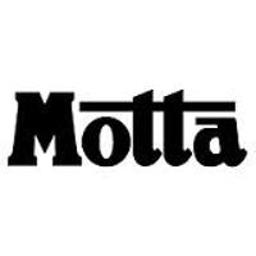

Imágenes Recuperadas (Total Imágenes: 8 imágenes)


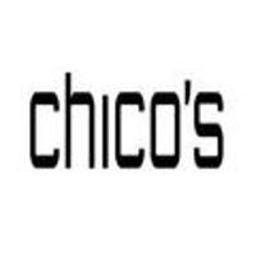

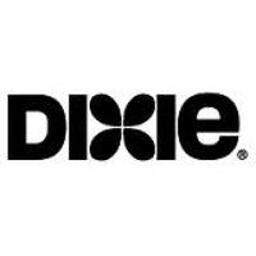

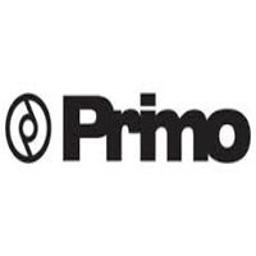

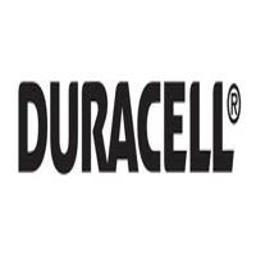

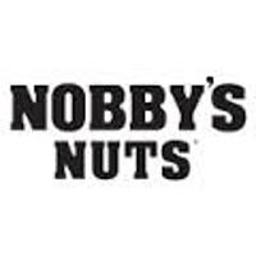

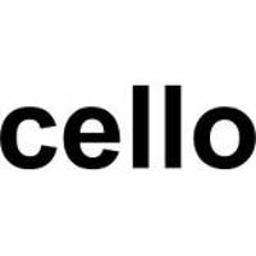

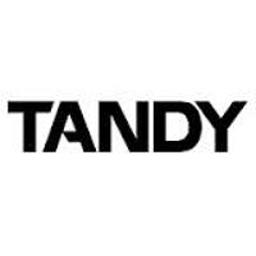

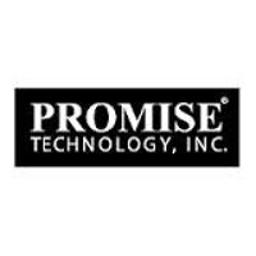

In [102]:
#@title Mostrar los K logos más similares { run: "auto" }
idx = 216 #@param {type:"slider", min:0, max:2340, step:1}
k = 8 #@param {type:"slider", min:1, max:30, step:1}
print("Imagen de Query")
display(Image(filenames[idx]))


########################################
####   Desarrolle su código aquí   #####
########################################
print("Imágenes Recuperadas (Total Imágenes: {} imágenes)".format(k))

from sklearn.neighbors import NearestNeighbors

# When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 
nn = NearestNeighbors(n_neighbors=k + 1 , p = 2)
nn.fit(features)

labels = nn.kneighbors([features[idx]], return_distance=False)
for i in range(1,k + 1):
    display(Image(filenames[labels[0,i]]))


#########################################